In [1]:
# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
price = pd. read_csv("market price index.csv", encoding = "euc-kr")
price.head()

,구별,2017년
0,종로구,161.475
1,중구,160.625
2,용산구,169.450
3,성동구,164.025
4,광진구,165.875


In [7]:
price.sort_values(by="2017년", ascending = False)

,구별,2017년
10,노원구,202.225
9,도봉구,186.800
15,강서구,183.550
8,강북구,181.400
12,서대문구,176.875
6,중랑구,176.800
13,마포구,175.875
11,은평구,174.375
16,구로구,173.450
17,금천구,173.100


In [8]:
subway = pd. read_csv("subway.csv", encoding = "euc-kr")
subway.head()

,구별,2017년
0,종로구,101.674167
1,중구,101.782583
2,용산구,102.884500
3,성동구,102.162417
4,광진구,102.350000


In [9]:
subway.sort_values(by="2017년", ascending = False)

,구별,2017년
15,강서구,103.301333
13,마포구,103.177000
2,용산구,102.884500
22,강남구,102.817583
23,송파구,102.653667
14,양천구,102.444833
4,광진구,102.350000
10,노원구,102.347500
21,서초구,102.272667
20,관악구,102.261250


In [10]:
data_result = pd.merge(price,subway,on="구별")

In [11]:
data_result

,구별,2017년_x,2017년_y
0,종로구,161.475,101.674167
1,중구,160.625,101.782583
2,용산구,169.450,102.884500
3,성동구,164.025,102.162417
4,광진구,165.875,102.350000
5,동대문구,165.775,102.066000
6,중랑구,176.800,101.928833
7,성북구,163.800,101.778083
8,강북구,181.400,101.655583
9,도봉구,186.800,102.038000


In [12]:
data_result.rename(columns={'2017년_x' : '거래가격 지수', '2017년_y' : '지하철 지가지수'}, inplace = True)

In [13]:
data_result

,구별,거래가격 지수,지하철 지가지수
0,종로구,161.475,101.674167
1,중구,160.625,101.782583
2,용산구,169.450,102.884500
3,성동구,164.025,102.162417
4,광진구,165.875,102.350000
5,동대문구,165.775,102.066000
6,중랑구,176.800,101.928833
7,성북구,163.800,101.778083
8,강북구,181.400,101.655583
9,도봉구,186.800,102.038000


In [14]:
data_result.describe()

,거래가격 지수,지하철 지가지수
count,25.000000,25.000000
mean,168.047000,102.208567
std,13.594832,0.467056
min,133.700000,101.507417
25%,161.475000,101.841000
50%,165.875000,102.137167
75%,175.875000,102.350000
max,202.225000,103.301333


In [13]:
np.corrcoef(data_result["거래가격 지수"],data_result["지하철 지가지수"])

array([[ 1.        , -0.04242023],
       [-0.04242023,  1.        ]])

#### 상관계수: -0.04

In [14]:
fp1 = np.polyfit(data_result["거래가격 지수"],data_result["지하철 지가지수"],1)

In [15]:
fp1

array([-1.45736569e-03,  1.02453473e+02])

In [16]:
f1 = np.poly1d(fp1)

In [17]:
f1

poly1d([-1.45736569e-03,  1.02453473e+02])

In [18]:
x = np.linspace(50,1600,100)

In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

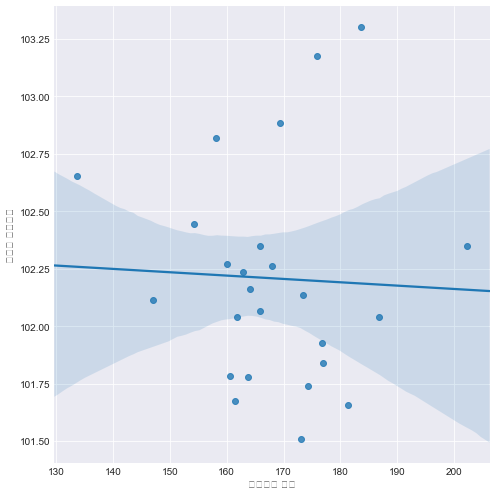

In [15]:
sns.set_style("darkgrid")
sns.lmplot(x="거래가격 지수", y="지하철 지가지수", data=data_result, size=7) # regression plot
plt.show()